In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance
from lib.entropy import entropy_time_evolution
from lib.chaos import *

plt.rcParams['font.family'] = 'Times New Roman' #全体のフォントを設定
plt.rcParams['mathtext.fontset'] = 'stix' # math fontの設定
plt.rcParams["font.size"] = 12 # 全体のフォントサイズが変更されます。

Locally coupled GL oscillators
 Estimated KS entropy: 3.7944346543850354
 Expected KS entropy: 3.833828989596387
 KY dimension: 24.840888355673012
Globally coupled GL oscillators
 Estimated KS entropy: 3.0346307469052105
 Expected KS entropy: 2.8473992871513465
 KY dimension: 21.632602250514253


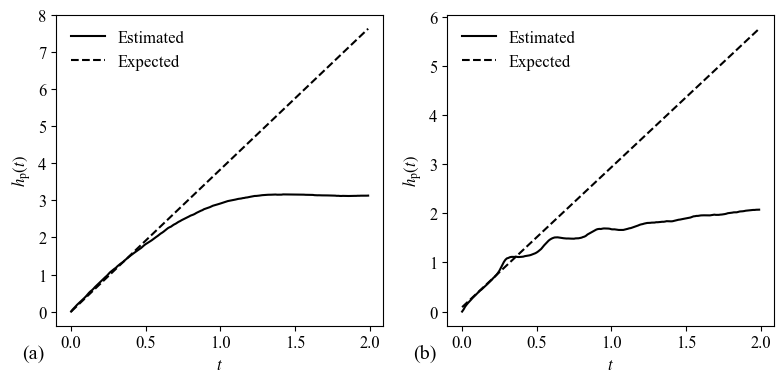

In [2]:
fig, axes = plt.subplots(1, 2, facecolor="white", figsize=(8, 4), tight_layout=True)


N = 16
c1 = -2.5
c2 = 3
K = 0.2
dt = 0.01
tend = 4000
cut = 100000
np.random.seed(0)
tspan = np.arange(0, tend, dt)
x0 = np.exp(2*np.pi*np.random.random(N)*1j)
system = Locally_coupled_limit_cycle_oscillators(c1, c2, K)
system.gen_time_series(x0, tspan, dt)
system.shimada_nagashima(system.time_serie[cut:, ], dt, qr_step=1)
lyapunov_exponents = system.lyapunov_exponents
ks = sum(lyapunov_exponents[lyapunov_exponents>0])

k = 32
time_delay = 40
dim = 16
fit_range = 40
random_state = 0
tau_span = np.arange(0, 200, 1)

X = system.time_serie.real[cut:, ]
X = np.hstack([X[:-time_delay,], X[time_delay:,]])
kmeans = KMeans(n_clusters=k, random_state=random_state, n_init="auto").fit(X)
labels = kmeans.labels_
h = entropy_time_evolution(labels, tau_span)
axes[0].plot(tau_span*dt, h, 'k', label='Estimated')
axes[0].plot(tau_span*dt, tau_span*dt*ks, 'k--', label='Expected')
axes[0].set_ylabel(r'$h_{\rm{p}}(t)$')
axes[0].set_xlabel(r'$t$')
axes[0].set_title('(a)', x=-0.07, y=-0.13)
axes[0].legend(frameon=False)
idx = tau_span<=fit_range
print('Locally coupled GL oscillators')
print(' Estimated KS entropy:', np.polyfit(tau_span[idx]*dt, h[idx], 1)[0])
print(' Expected KS entropy:', ks)
print(' KY dimension:', ky_dim(lyapunov_exponents))




N = 16
c1 = -2.5
c2 = 2.5
K = 0.6
dt = 0.01
tend = 6000
cut = 300000
np.random.seed(1)
tspan = np.arange(0, tend, dt)
x0 = np.exp(2*np.pi*np.random.random(N)*1j)
system = Globally_coupled_limit_cycle_oscillators(c1, c2, K)
system.gen_time_series(x0, tspan, dt)
system.shimada_nagashima(system.time_serie[cut:, ], dt, qr_step=1)
lyapunov_exponents = system.lyapunov_exponents
ks = sum(lyapunov_exponents[lyapunov_exponents>0])

k = 32
time_delay = 70
dim = 16
fit_range = 40
random_state = 0
tau_span = np.arange(0, 200, 1)

X = system.time_serie.real[cut:, ]
X = np.hstack([X[:-time_delay,], X[time_delay:,]])
kmeans = KMeans(n_clusters=k, random_state=random_state, n_init="auto").fit(X)
labels = kmeans.labels_
h = entropy_time_evolution(labels, tau_span)
axes[1].plot(tau_span*dt, h, 'k', label='Estimated')
axes[1].plot(tau_span*dt, tau_span*dt*ks+0.09, 'k--', label='Expected')
axes[1].set_ylabel(r'$h_{\rm{p}}(t)$')
axes[1].set_xlabel(r'$t$')
axes[1].set_title('(b)', x=-0.07, y=-0.13)
axes[1].legend(frameon=False)
idx = tau_span<=fit_range
print('Globally coupled GL oscillators')
print(' Estimated KS entropy:', np.polyfit(tau_span[idx]*dt, h[idx], 1)[0])
print(' Expected KS entropy:', ks)
print(' KY dimension:', ky_dim(lyapunov_exponents))